In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import fastcluster
from sklearn.metrics.pairwise import pairwise_distances
import seaborn as sns
import scipy.spatial as sp
import scipy.cluster.hierarchy as hc

from ete3 import NCBITaxa
ncbi = NCBITaxa()

In [2]:
Demo = True  # Change to False if you want to run the script on the full dataset

# Load the OG DataFrame

In [7]:
if Demo == True:
    filepath = "../Data/demo/OFOG&eOGCounts.csv"
else:
    filepath = "../Data/output/AllOFOG&eOGCounts.csv"

Root_OG_Counts = pd.read_csv(filepath, index_col=0)
Root_OG_Counts.head()

,1047013,1054217,1117647,1120960,1121920,1122621,1123288,1123376,1125701,1131269,...,907239,907348,926567,927658,929558,931626,938709,985053,Loki 4,Thor
COG,,,,,,,,,,,,,,,,,,,,,
28HFG,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
28HG3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28KRP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28M6C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28R8J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
RootOGs = Root_OG_Counts > 0
RootOGs = RootOGs[RootOGs.sum(axis=1) > 10]

RootOGs

,1047013,1054217,1117647,1120960,1121920,1122621,1123288,1123376,1125701,1131269,...,907239,907348,926567,927658,929558,931626,938709,985053,Loki 4,Thor
COG,,,,,,,,,,,,,,,,,,,,,
COG0010,True,True,True,True,True,True,True,False,True,False,...,True,True,True,True,False,True,True,True,False,False
COG0190,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,True,True
COG0280,True,False,True,True,True,True,True,False,True,False,...,True,True,True,True,True,True,True,False,False,False
COG0282,True,False,False,True,True,False,True,False,True,False,...,True,True,True,True,True,True,False,False,False,False
COG0373,False,True,True,True,True,True,True,True,False,True,...,True,True,True,False,True,True,True,True,False,False
COG0551,False,False,True,False,False,False,True,False,False,True,...,True,True,False,False,False,True,False,False,False,False
COG0669,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
COG0685,True,False,True,True,True,True,True,True,False,False,...,False,True,True,True,True,True,True,True,False,False
COG0717,False,True,True,True,True,True,False,True,False,True,...,True,False,False,False,False,True,False,True,False,False


# Compute the Jaccard pairwise distance

In [9]:
%%time
Jaccard_dist = pd.DataFrame(pairwise_distances(np.array(
    RootOGs), metric="jaccard"), index=RootOGs.index, columns=RootOGs.index)

Jaccard_dist

CPU times: user 4.68 ms, sys: 9.54 ms, total: 14.2 ms
Wall time: 11.2 ms


COG,COG0010,COG0190,COG0280,COG0282,COG0373,COG0551,COG0669,COG0685,COG0717,COG1152,...,COG2141,COG2218,COG2759,COG3104,COG3200,COG3252,COG3339,COG3383,COG3836,COG4021
COG,,,,,,,,,,,,,,,,,,,,,
COG0010,0.000000,0.530435,0.568627,0.548077,0.423077,0.707865,0.504505,0.448598,0.587629,0.860465,...,0.678571,0.850000,0.541667,0.771084,0.872093,0.837500,0.678161,0.660550,0.804878,0.862500
COG0190,0.530435,0.000000,0.290323,0.236559,0.405405,0.666667,0.054348,0.262136,0.717949,0.890000,...,0.807692,0.980583,0.500000,0.736264,0.791209,0.990476,0.623656,0.271739,0.831579,0.960000
COG0280,0.568627,0.290323,0.000000,0.215190,0.547170,0.734940,0.247191,0.408163,0.824074,0.900000,...,0.825581,0.962025,0.571429,0.722222,0.757143,0.975309,0.636364,0.400000,0.794521,0.961538
COG0282,0.548077,0.236559,0.215190,0.000000,0.527778,0.674699,0.211111,0.357143,0.800000,0.879518,...,0.835165,0.951807,0.465909,0.756410,0.789474,0.964706,0.607595,0.301205,0.792208,0.963855
COG0373,0.423077,0.405405,0.547170,0.527778,0.000000,0.602273,0.403670,0.326923,0.535354,0.795455,...,0.632184,0.837209,0.666667,0.791209,0.793103,0.825581,0.677419,0.504854,0.822222,0.862069
COG0551,0.707865,0.666667,0.734940,0.674699,0.602273,0.000000,0.655914,0.684211,0.814815,0.812500,...,0.771930,0.840909,0.807229,0.780000,0.857143,0.869565,0.766667,0.653846,0.860000,0.936170
COG0669,0.504505,0.054348,0.247191,0.211111,0.403670,0.655914,0.000000,0.222222,0.732759,0.886598,...,0.813725,0.969697,0.500000,0.727273,0.784091,0.980198,0.611111,0.227273,0.813187,0.958763
COG0685,0.448598,0.262136,0.408163,0.357143,0.326923,0.684211,0.222222,0.000000,0.663636,0.863158,...,0.765306,0.948454,0.500000,0.769231,0.824176,0.938144,0.655914,0.304348,0.800000,0.890110
COG0717,0.587629,0.717949,0.824074,0.800000,0.535354,0.814815,0.732759,0.663636,0.000000,0.765625,...,0.685714,0.803279,0.739583,0.893333,0.835821,0.786885,0.883721,0.742574,0.887324,0.838710


# Create Hierarchichal Clusters

In [10]:
%%time
linkage = hc.linkage(sp.distance.squareform(Jaccard_dist), method='average')

CPU times: user 4 ms, sys: 5.58 ms, total: 9.57 ms
Wall time: 15.3 ms


In [11]:
T_range = np.arange(0, 1.01, 0.01)

clusters = pd.DataFrame(index=Jaccard_dist.index, columns=T_range)

for T in T_range:
    clusters[T] = hc.fcluster(linkage, t=T, criterion='distance')

clusters

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.00
COG,,,,,,,,,,,,,,,,,,,,,
COG0010,19,19,19,19,19,19,18,18,17,17,...,1,1,1,1,1,1,1,1,1,1
COG0190,12,12,12,12,12,12,12,12,11,11,...,1,1,1,1,1,1,1,1,1,1
COG0280,10,10,10,10,10,10,10,10,9,9,...,1,1,1,1,1,1,1,1,1,1
COG0282,11,11,11,11,11,11,11,11,10,10,...,1,1,1,1,1,1,1,1,1,1
COG0373,17,17,17,17,17,17,16,16,15,15,...,1,1,1,1,1,1,1,1,1,1
COG0551,21,21,21,21,21,21,20,20,19,19,...,1,1,1,1,1,1,1,1,1,1
COG0669,13,13,13,13,13,13,12,12,11,11,...,1,1,1,1,1,1,1,1,1,1
COG0685,15,15,15,15,15,15,14,14,13,13,...,1,1,1,1,1,1,1,1,1,1
COG0717,24,24,24,24,24,24,23,23,22,22,...,1,1,1,1,1,1,1,1,1,1


All OGs


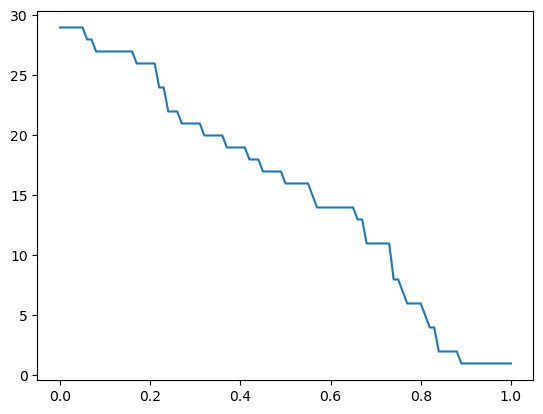

In [12]:
plt.plot(T_range, clusters.nunique())
print("All OGs")
plt.show()

Based on this plot, choose a value for T that generates a reasonable number of clusters that are small enough to plot

In [13]:
if Demo == True:
    T = 0.3
else:
    T = 0.85

clustering = pd.DataFrame(hc.fcluster(
    linkage, t=T, criterion='distance'), index=Jaccard_dist.index)
Counts = clustering.value_counts()
Counts = Counts[Counts > 1]
Counts

8    5
1    3
2    3
7    2
dtype: int64

Determine in which clusters the WLP genes are.

In [14]:
WLP_genes = np.concatenate(pd.read_csv(
    "../Data/input/AllWLPGenes.csv", sep=";", comment="#", header=0).loc[:, ["COG"]].values)

WLPClustering = clustering.loc[clustering.index.isin(WLP_genes)]

Counts = WLPClustering.value_counts()
Counts = Counts[Counts > 1]
clusternr = Counts.idxmax()[0]

print("WLP COG clusters:", "\n", WLPClustering, "\n\n",
      "Count of WLP COGs per cluster", "\n", Counts)

WLP COG clusters: 
           0
COG        
COG0190   8
COG0280   7
COG0282   7
COG0373   9
COG0685   8
COG1152   5
COG1410   8
COG1456   1
COG1614   1
COG1962   3
COG2037   2
COG2069   1
COG2141   4
COG2218   2
COG2759  12
COG3252   2
COG3383   8 

 Count of WLP COGs per cluster 
 8    4
1    3
2    3
7    2
dtype: int64


## Plot the largest cluster

CPU times: user 520 ms, sys: 122 ms, total: 642 ms
Wall time: 312 ms


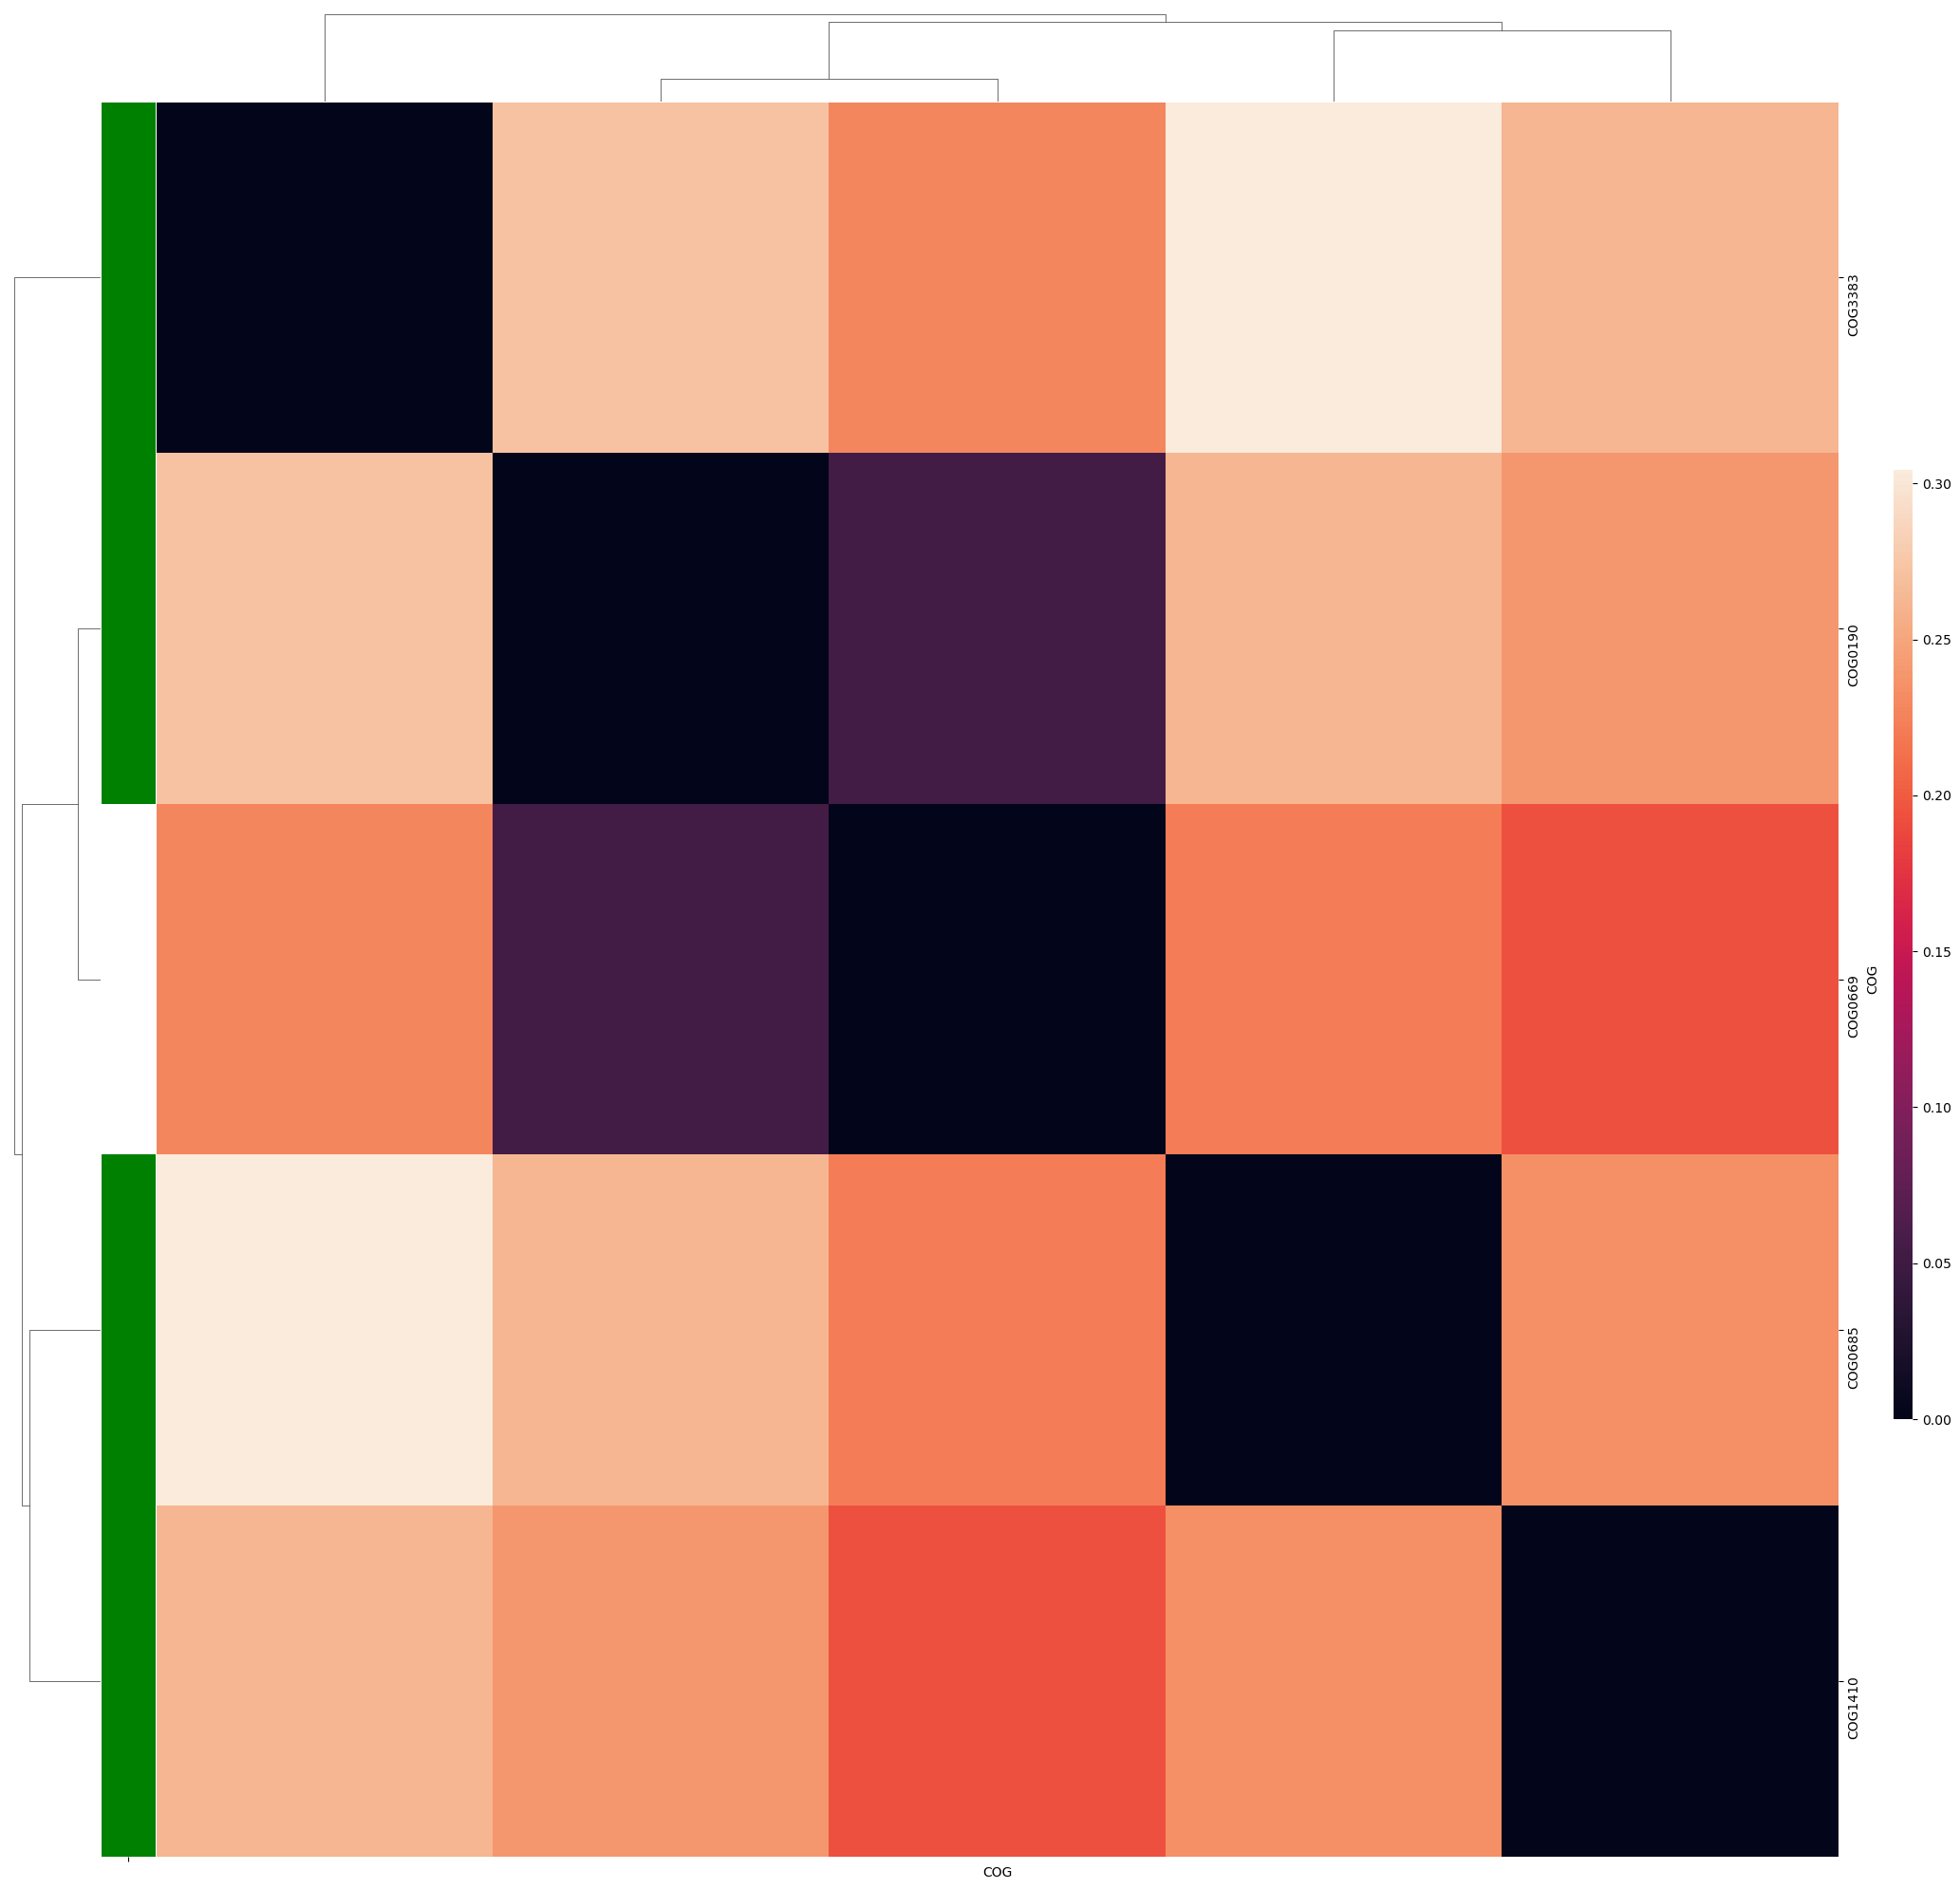

In [15]:
%%time
function = pd.Series(
    "CoreWLP", index=WLPClustering[WLPClustering[0] == clusternr].index)
lut = dict(zip(function.unique(), "g"))
row_colors = function.map(lut)

mask = clustering[clustering.iloc[:, 0] == clusternr].index
SubJaccard = Jaccard_dist.loc[mask, mask]

OGHeatMap = sns.clustermap(SubJaccard, figsize=(20, 20), dendrogram_ratio=0.05, row_colors=row_colors, cbar_pos=(
    1, 0.25, 0.01, 0.5), row_cluster=True, yticklabels=True, xticklabels=False)

## Plot a cluster of choice

CPU times: user 1.22 s, sys: 749 ms, total: 1.97 s
Wall time: 1.8 s


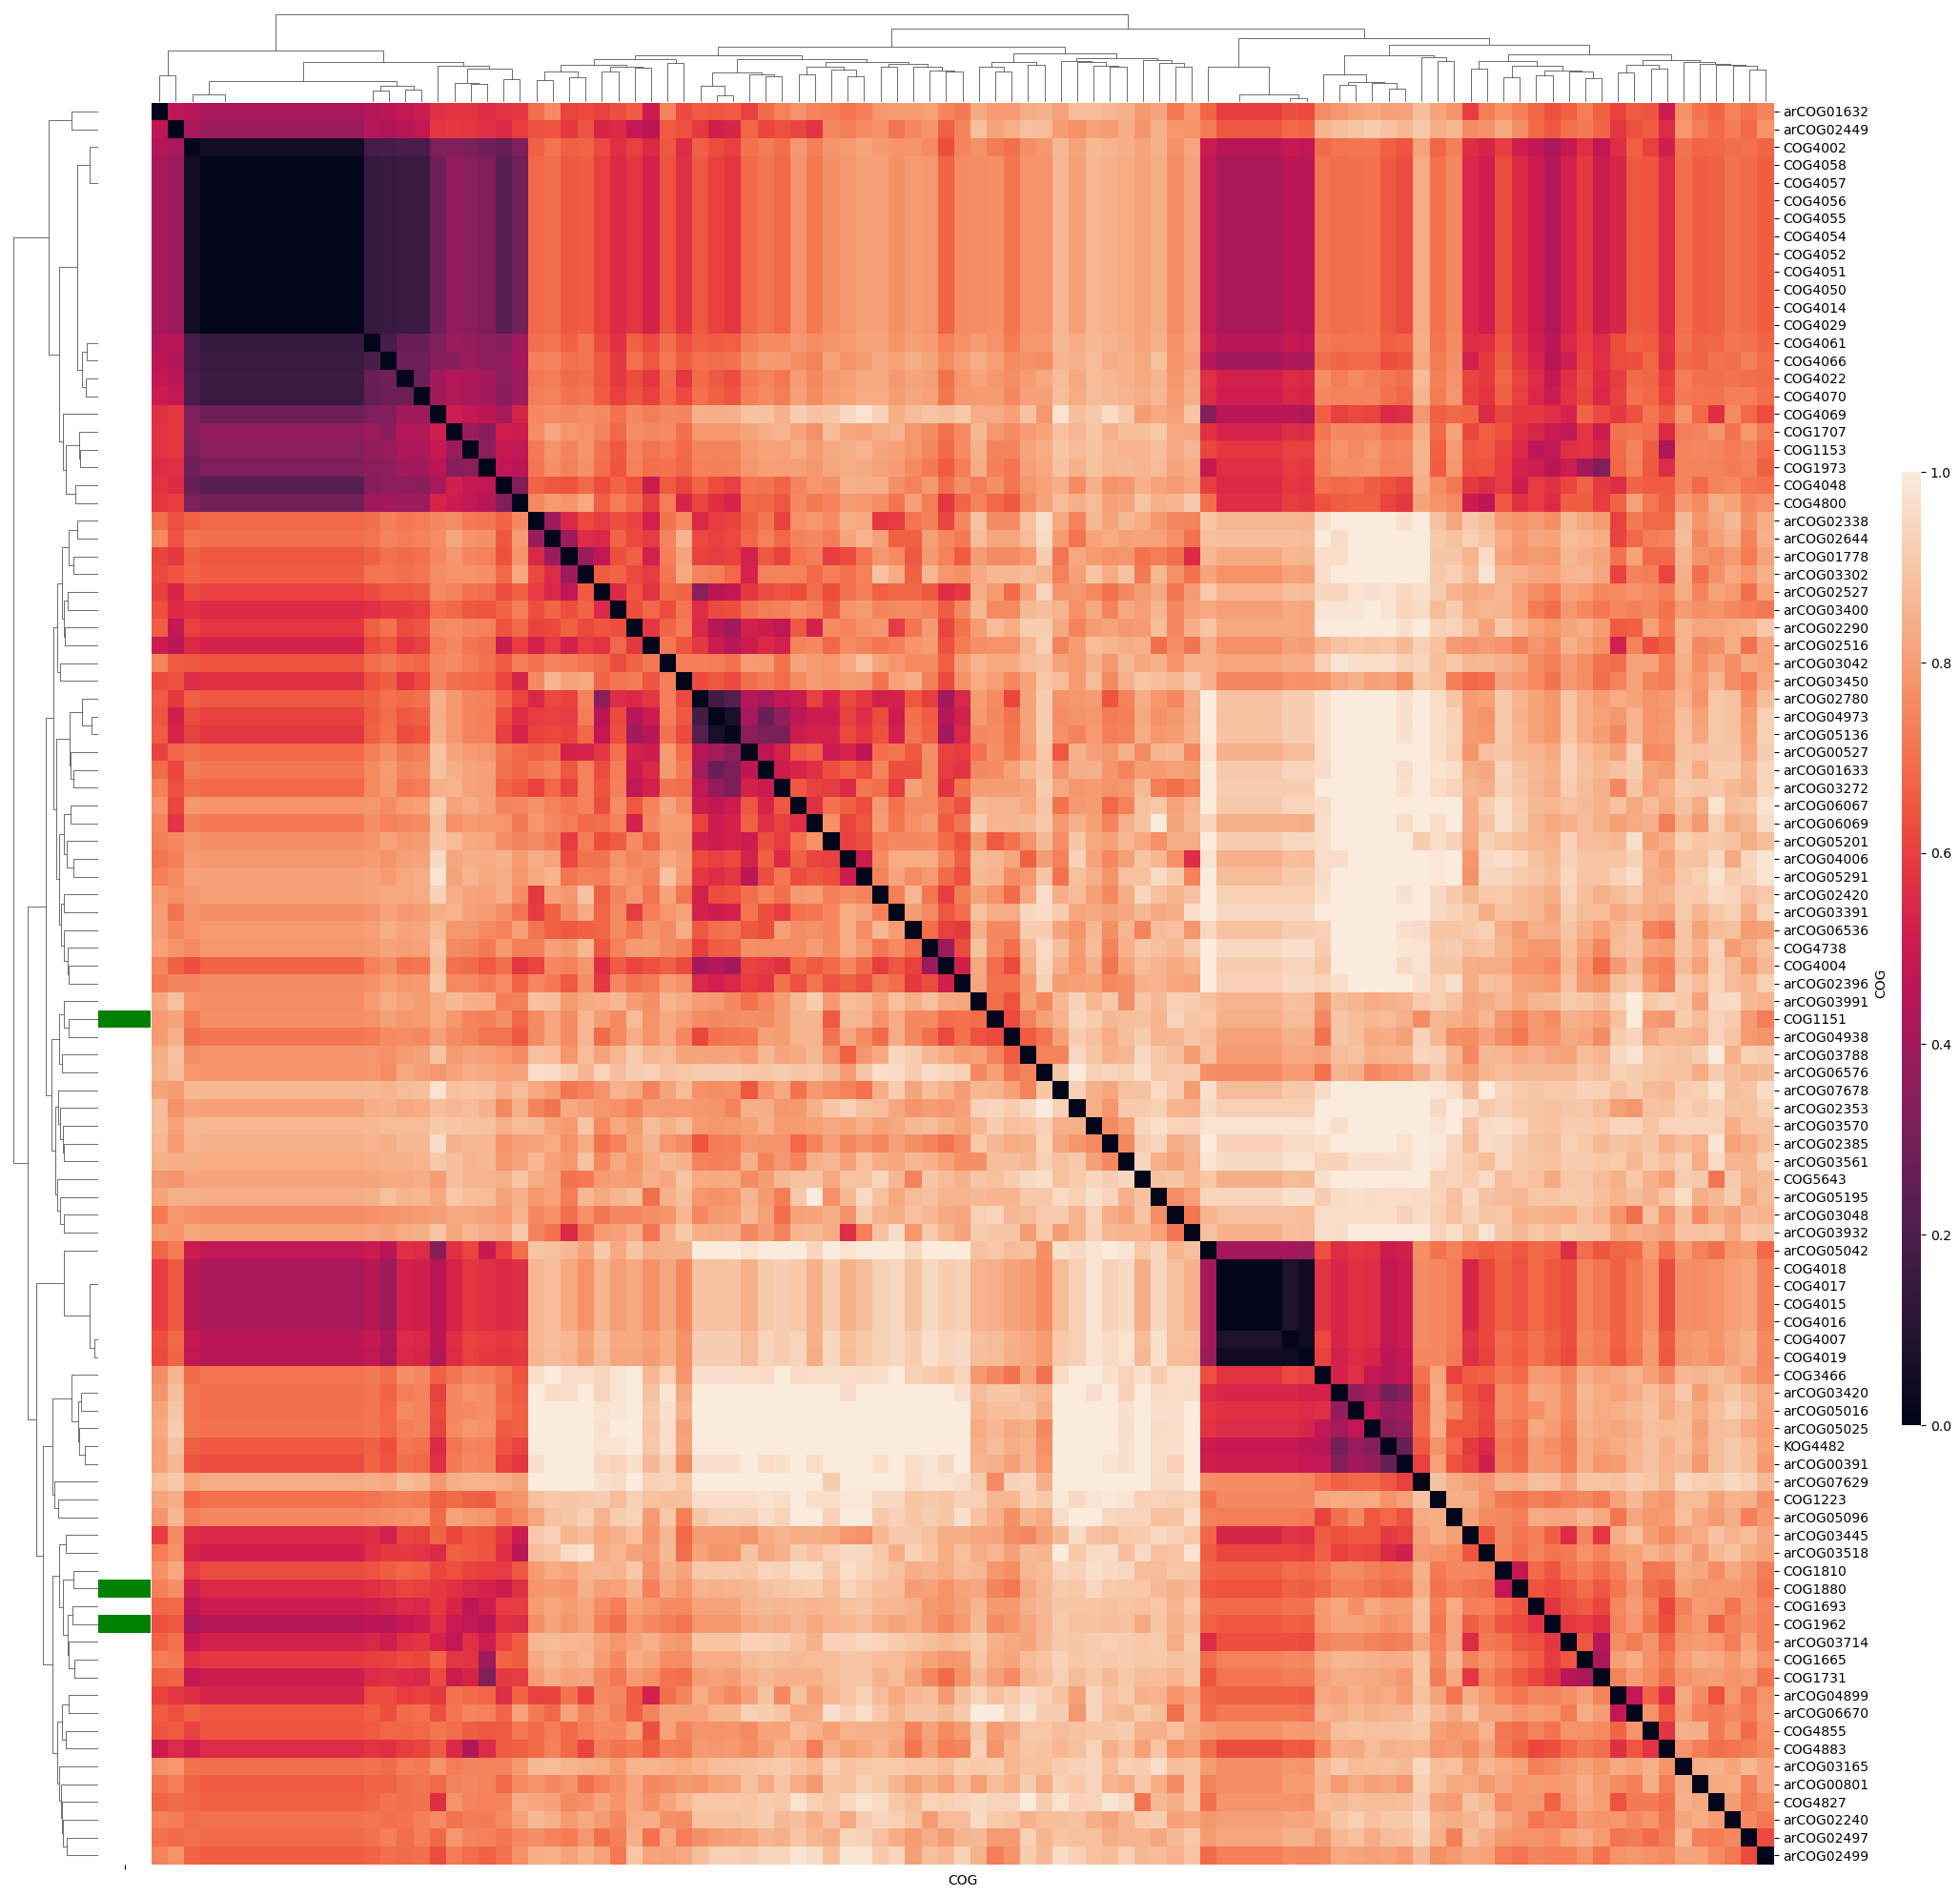

In [41]:
%%time
ClusterOI = 1318

function = pd.Series(
    "CoreWLP", index=WLPClustering[WLPClustering[0] == ClusterOI].index)
lut = dict(zip(function.unique(), "g"))
row_colors = function.map(lut)

mask = clustering[clustering.iloc[:, 0] == ClusterOI].index
SubJaccard = Jaccard_dist.loc[mask, mask]

OGHeatMap = sns.clustermap(SubJaccard, figsize=(20, 20), dendrogram_ratio=0.05, row_colors=row_colors, cbar_pos=(
    1, 0.25, 0.01, 0.5), row_cluster=True, yticklabels=True, xticklabels=False)